# Machine Learning
---

The following ML models are tested out:
- Naive Bayes
- Decision Tree Classification
- Logistic Regression Classification
- Support Vector Machine Classification
- Random Forest Classification



## Initialization

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # we only need pyplot
import plotly.figure_factory as ff

from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score

In [2]:
jobData = pd.read_csv("Datasets/cleaned_data.csv")
jobData.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,country_code_is_TW,country_code_is_UA,country_code_is_UG,country_code_is_US,country_code_is_VI,country_code_is_VN,country_code_is_ZA,country_code_is_ZM,country_code,lemmatized_documents
0,1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NOBENEFITS,False,...,False,False,False,True,False,False,False,False,US,marketing intern marketing food52 create groun...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,False,...,False,False,False,False,False,False,False,False,NZ,customer service - cloud video production succ...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NODEPARTMENT,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NOBENEFITS,False,...,False,False,False,True,False,False,False,False,US,commission machinery assistant cma nodepartmen...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,False,...,False,False,False,True,False,False,False,False,US,account executive - washington dc sale passion...
4,5,Bill Review Manager,"US, FL, Fort Worth",NODEPARTMENT,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,False,...,False,False,False,True,False,False,False,False,US,bill review manager nodepartment spotsource so...


## Applying Naive Bayes model on Text columns

The lemmatized text document are converted to useful numeric values by CountVectorizer with bigram.

This means the algorithm will generate a matrix by counting the occurances of pairs of words.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
#Bigram is used. It finds count of each pair words in the text. feature extraction
cv = CountVectorizer(ngram_range=(2,2))

#Vectorizer converts the list of words into a proper matrix of word counts for each word, for each data entry
X_text_data = cv.fit_transform(jobData['lemmatized_documents'])
y_text_data = jobData['fraudulent']
X_text_data

<17880x893991 sparse matrix of type '<class 'numpy.int64'>'
	with 4116089 stored elements in Compressed Sparse Row format>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text_data, y_text_data, test_size=0.3)
mnb = MultinomialNB()
mnb.fit(X_text_train, y_text_train)

MultinomialNB()

In [5]:
pred_text_train = pd.DataFrame(mnb.predict(X_text_train), columns=['prediction'], index=y_text_train.index)

print("Train data Accuracy:\t", mnb.score(X_text_train, y_text_train))
print("Train data F1 score:\t", f1_score(y_text_train, pred_text_train))

x_label = ['0', '1']
y_label = ['1', '0']
fig = ff.create_annotated_heatmap(confusion_matrix(y_text_train, pred_text_train), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Train data Accuracy:	 0.989533397251518
Train data F1 score:	 0.9038884812912693


In [6]:
pred_text_test = pd.DataFrame(mnb.predict(X_text_test), columns=['prediction'], index=y_text_test.index)

print("Test data Accuracy:\t", mnb.score(X_text_test, y_text_test))
print("Test data F1 score:\t", f1_score(y_text_test, pred_text_test))

fig = ff.create_annotated_heatmap(confusion_matrix(y_text_test, pred_text_test), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Test data Accuracy:	 0.9203952274422073
Test data F1 score:	 0.4799025578562729


In [7]:
nlp_pred = pd.DataFrame(mnb.predict_proba(X_text_data), columns=['nlp_p_real', 'nlp_p_fraud'])['nlp_p_fraud']
nlp_pred

0        3.372100e-155
1         0.000000e+00
2         3.653966e-96
3         0.000000e+00
4        4.036533e-181
             ...      
17875     0.000000e+00
17876    4.124435e-192
17877    6.698017e-117
17878     3.857465e-34
17879     0.000000e+00
Name: nlp_p_fraud, Length: 17880, dtype: float64

In [8]:
jobData["NLP_Pred"] = nlp_pred

## Preparing the train and test datasets

Dropping unprocessed columns that contains non-numeric values.

30% of the data are chosen to be the test data, while the remaining 70% data will be used for model training.

In [9]:
y = pd.DataFrame(jobData['fraudulent'])

to_drop = ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country_code', 'fraudulent', 'lemmatized_documents']
X = jobData.copy()
X.drop(to_drop, axis = 1, inplace = True)

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

print("X_train:\t", len(X_train))
print("X_test:\t\t", len(X_test))
print("y_train:\t", len(y_train))
print("y_test:\t\t", len(y_test))

X_train:	 12516
X_test:		 5364
y_train:	 12516
y_test:		 5364


## Decision Tree

Max depth of the tree is set to 3.

In [11]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
train_pred = pd.DataFrame(dectree.predict(X_train), columns=['prediction'], index=y_train.index)

print("Train data accuracy:\t", dectree.score(X_train, y_train))
print("Train data f1_score:\t", f1_score(y_train, train_pred))

fig = ff.create_annotated_heatmap(confusion_matrix(y_train, train_pred), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Train data accuracy:	 0.9829018855864493
Train data f1_score:	 0.8386123680241329


In [13]:
test_pred = pd.DataFrame(dectree.predict(X_test), columns=['prediction'], index=y_test.index)

print("Test data accuracy:\t", dectree.score(X_test, y_test))
print("Test data f1_score:\t", f1_score(y_test, test_pred))

fig = ff.create_annotated_heatmap(confusion_matrix(y_test, test_pred), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Test data accuracy:	 0.9806114839671887
Test data f1_score:	 0.8007662835249042


Annotation(3348, 5707.8, 'NLP_Pred <= 1.0\ngini = 0.096\nsamples = 12516\nvalue = [11886, 630]\nclass = False')
Annotation(3348, 5707.8, 'NLP_Pred <= 0.945\ngini = 0.011\nsamples = 11738\nvalue = [11673, 65]\nclass = False')
Annotation(1674, 4077, 'NLP_Pred <= 0.0\ngini = 0.007\nsamples = 11625\nvalue = [11582, 43]\nclass = False')
Annotation(837, 2446.2, 'gini = 0.005\nsamples = 11415\nvalue = [11387, 28]\nclass = False')
Annotation(837, 2446.2, 'gini = 0.133\nsamples = 210\nvalue = [195, 15]\nclass = False')
Annotation(1674, 4077, 'country_code_is_AU <= 0.5\ngini = 0.314\nsamples = 113\nvalue = [91, 22]\nclass = False')
Annotation(2511, 2446.2, 'gini = 0.265\nsamples = 108\nvalue = [91, 17]\nclass = False')
Annotation(2511, 2446.2, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = True')
Annotation(3348, 5707.8, 'country_code_is_US <= 0.5\ngini = 0.398\nsamples = 778\nvalue = [213, 565]\nclass = True')
Annotation(5022, 4077, 'has_company_logo <= 0.5\ngini = 0.483\nsamples = 181\nvalu

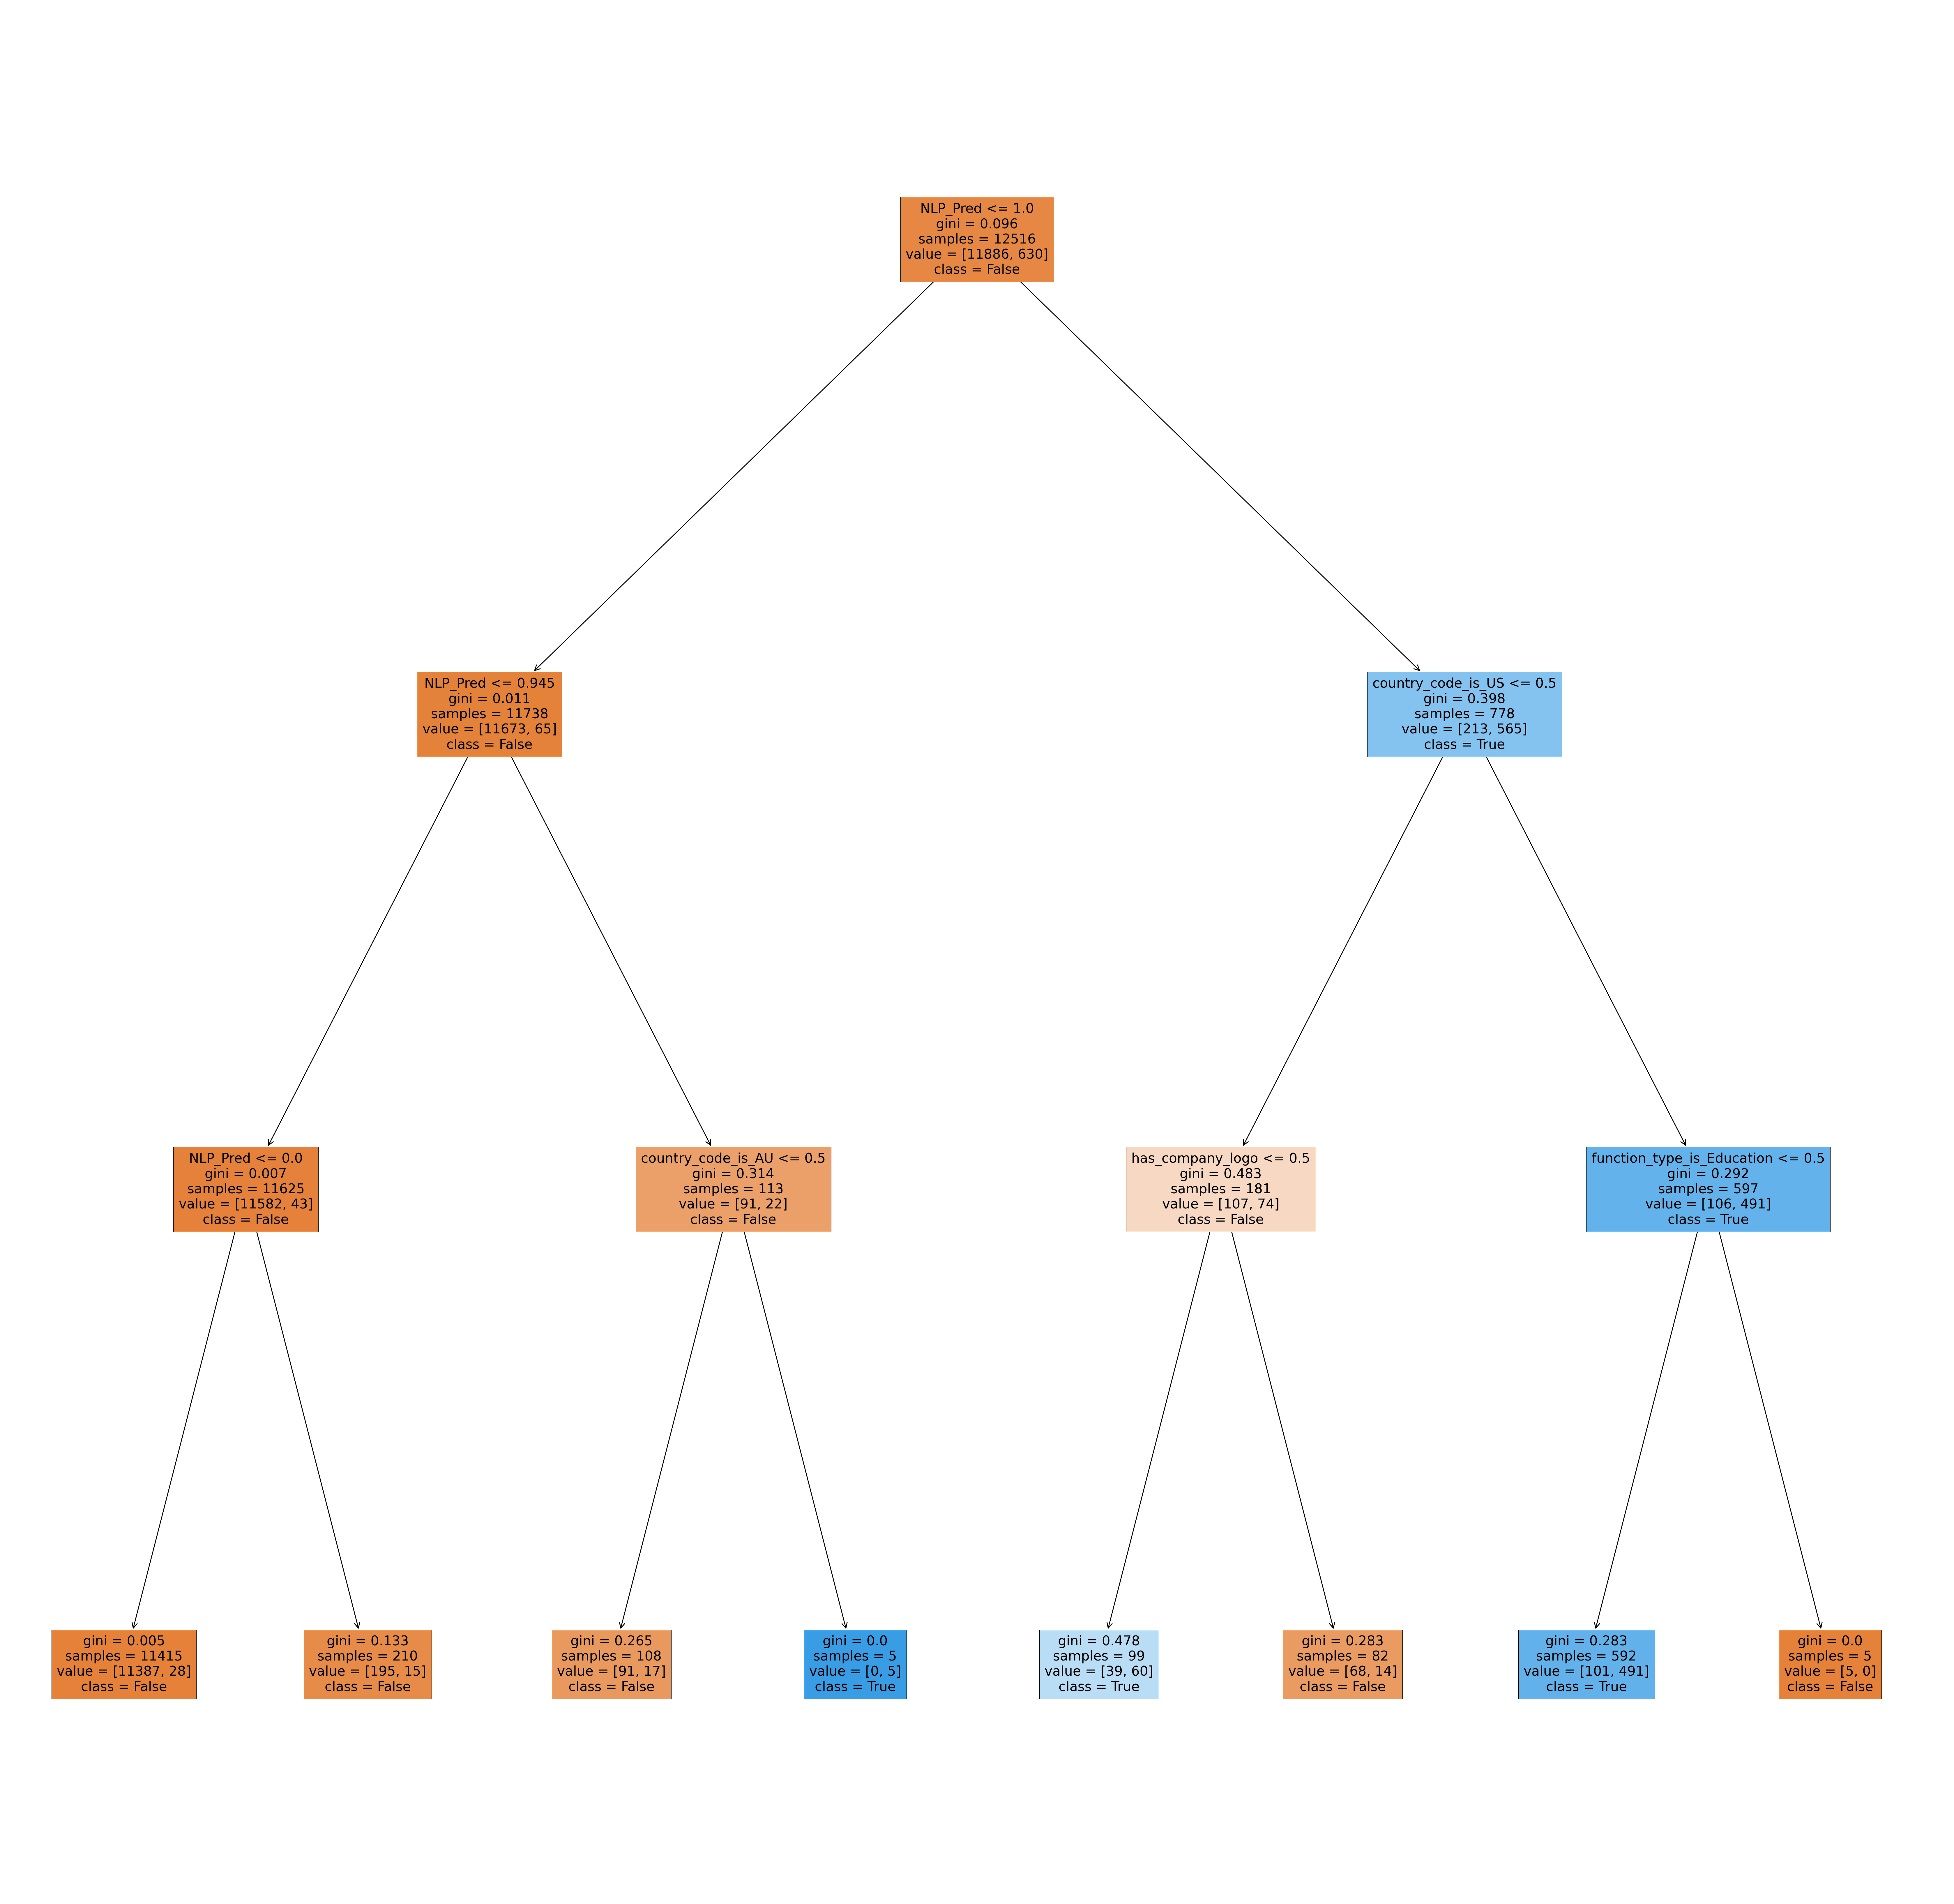

In [14]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(120, 120))
out = plot_tree(dectree, 
          feature_names = X.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    print(o)
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

## Logistic Regression

Uses the logistic regression model. However, the default model does not perform well on imbalanced data. The current data set has 95% of values in 1 class, which will affect the model. Hence, additional weightage must be applied to the 'fraudulent' class. 

This increases cost associated with predicting a fraudulent class wrongly in the cost function. The model now values getting a fraudulent prediction correct more than getting a not-fraudulent prediction wrong.

In [15]:
from sklearn.linear_model import LogisticRegression

#Uses a weightage of 1:16
logreg = LogisticRegression(class_weight={0: 1, 1: 16})
logreg.fit(X_train, y_train['fraudulent'])

LogisticRegression(class_weight={0: 1, 1: 16})

In [16]:
train_pred = pd.DataFrame(logreg.predict(X_train), columns=['prediction'], index=y_train.index)

print("Train data accuracy:\t", logreg.score(X_train, y_train))
print("Train data f1_score:\t", f1_score(y_train, train_pred))

fig = ff.create_annotated_heatmap(confusion_matrix(y_train, train_pred), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Train data accuracy:	 0.9387983381271972
Train data f1_score:	 0.5151898734177215


In [17]:
test_pred = pd.DataFrame(logreg.predict(X_test), columns=['prediction'], index=y_test.index)

print("Test data accuracy:\t", logreg.score(X_test, y_test))
print("Test data f1_score:\t", f1_score(y_test, test_pred))

fig = ff.create_annotated_heatmap(confusion_matrix(y_test, test_pred), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Test data accuracy:	 0.9362416107382551
Test data f1_score:	 0.47384615384615386


## Support Vector Machine

RBF is chosen for the kernel of our SVM.

Gamma value and C value are set to 0.5 and 70 for the highest results in F1 scores.

In [18]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='rbf', gamma=0.5, C=70) # parameters to be adjusted

# Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [19]:
print("Train data Accuracy:\t", accuracy_score(y_train, y_train_pred))
print("Train Data Precision:\t", precision_score(y_train, y_train_pred))
print("Train Data F1 score:\t", f1_score(y_train, y_train_pred))

fig = ff.create_annotated_heatmap(confusion_matrix(y_train, y_train_pred), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Train data Accuracy:	 0.9962448066474913
Train Data Precision:	 0.9547581903276131
Train Data F1 score:	 0.963021243115657


In [20]:
print("Test data Accuracy:\t", accuracy_score(y_test, y_test_pred))
print("Test Data Precision:\t", precision_score(y_test, y_test_pred))
print("Test Data F1 score:\t", f1_score(y_test, y_test_pred))

fig = ff.create_annotated_heatmap(confusion_matrix(y_test, y_test_pred), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Test data Accuracy:	 0.9791200596569725
Test Data Precision:	 0.7719298245614035
Test Data F1 score:	 0.7586206896551725


## Random Forest

This is an improved version of Decision Tree model. Voting process is involved in this model. 

This model so far gives the best classification results as the F1 scores are generally the highest.

In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=255)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [22]:
print("Train data Accuracy:\t", accuracy_score(y_train, y_train_pred))
print("Train Data Precision:\t", precision_score(y_train, y_train_pred))
print("Train Data F1 score:\t", f1_score(y_train, y_train_pred))

fig = ff.create_annotated_heatmap(confusion_matrix(y_train, y_train_pred), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Train data Accuracy:	 0.9975231703419623
Train Data Precision:	 0.9731437598736177
Train Data F1 score:	 0.9754552652414884


In [23]:
print("Test data Accuracy:\t", accuracy_score(y_test, y_test_pred))
print("Test Data Precision:\t", precision_score(y_test, y_test_pred))
print("Test Data F1 score:\t", f1_score(y_test, y_test_pred))

fig = ff.create_annotated_heatmap(confusion_matrix(y_test, y_test_pred), x=x_label, y=y_label, colorscale='RdBu', reversescale=True)
fig.show()

Test data Accuracy:	 0.9847129008202834
Test Data Precision:	 0.8235294117647058
Test Data F1 score:	 0.8270042194092827


In [24]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp.head(10)

NLP_Pred                                           0.474337
has_company_logo                                   0.053885
industry_is_Oil & Energy                           0.027174
salary_upper_limit                                 0.022958
salary_lower_limit                                 0.022316
has_questions                                      0.020138
country_code_is_US                                 0.017691
function_type_is_Administrative                    0.015025
industry_is_Accounting                             0.011386
required_education_is_High School or equivalent    0.011225
dtype: float64

As seen from the probabilities above, NLP_Pred is the most important predictor among all, which means it plays an dominant role in classifying fake job postings.

This also means the text data in each job postings are indispensable in a comprehensive classification model.